In [1]:
import charts_function_list
import os

In [2]:
base,data,outputs = charts_function_list.folder_setup()
os.chdir(data)

In [202]:
animal = pd.read_csv('a_a_animal.csv')
animal = animal.dropna(subset=['Alex'],axis=0).copy()
animal['Alex Count'] = ''
animal['Andrea Count'] = ''
animal.loc[(animal['Alex']=='VEG'),'Alex Count'] = 0
animal.loc[(animal['Andrea']=='VEG'),'Andrea Count'] = 0
animal['Date'] = pd.to_datetime(animal['Date']).apply(lambda x:x.strftime("%-m/%-d"))

animal['Alex'],animal['Andrea'] = [animal[us].apply(lambda x: x.split(',')) for us in ['Alex','Andrea']]
animal.loc[animal['Andrea'].apply(lambda x:x[0]!='VEG'),'Andrea Count'] = animal.loc[animal['Andrea'].apply(lambda x:x[0]!='VEG'),'Andrea'].apply(lambda x: len(x))
animal.loc[animal['Alex'].apply(lambda x:x[0]!='VEG'),'Alex Count'] = animal.loc[animal['Alex'].apply(lambda x:x[0]!='VEG'),'Alex'].apply(lambda x: len(x))

In [216]:
animal[['Alex Count','Andrea Count']].max().max()

12.0

In [238]:
animal.loc[[int(x) for x in set(ax.get_xticks())&set(animal.index)]]['Date'].values

array(['3/27', '3/29', '3/31', '4/2', '4/4', '4/6', '4/8', '4/10'],
      dtype=object)

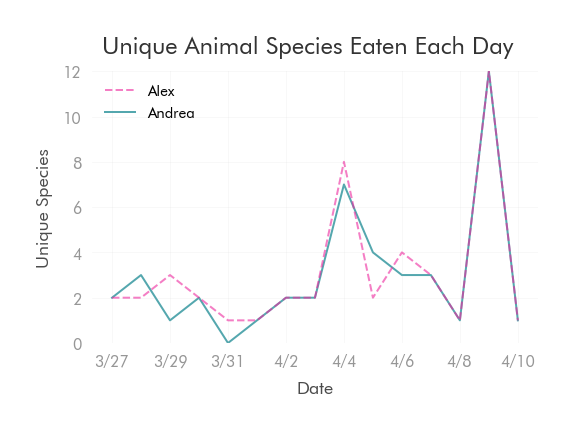

In [245]:
animal_chart = charts_function_list.chart_maker(title='Unique Animal Species Eaten Each Day',title_size=24)
fig = animal_chart.initial_fig_axis(figsize=(8,5))
ax = animal_chart.axes_set_up(fig=fig)
ax.plot(animal.index,animal['Alex Count'].values,linewidth=2,label='Alex',color='#ED289E',alpha=.6,linestyle='--',zorder=2)
ax.plot(animal.index,animal['Andrea Count'].values,linewidth=2,label='Andrea',color='#54A7AE',zorder=1)
ax.legend(fontsize=15)

yticks = ax.set_yticks([int(x) for x in ax.get_yticks()[[x == 0 for x in ax.get_yticks()%1]]])
xtickslabels = ax.set_xticklabels(['']+list(animal.loc[[int(x) for x in set(ax.get_xticks())&set(animal.index)]]['Date'].values))
ax.set_xlabel('Date',fontsize=18,alpha=.7)
ax.set_ylabel('Unique Species',fontsize=18,alpha=.7)
ax.set_ylim(0,animal[['Alex Count','Andrea Count']].max().max())
animal_chart.tick_params_(ax=ax,pad=10)

In [80]:
animal['Alex Animals'] = animal['Alex'].apply(lambda x: len(x))
animal['Andrea Animals'] = animal['Andrea'].apply(lambda x: len(x))

In [90]:
animal.loc[(animal['Alex']!='VEG'),'Alex Count'] = animal.loc[(animal['Alex']!='VEG'),'Alex'].apply(lambda x: len(x))
animal.loc[(animal['Andrea']!='VEG'),'Andrea Count'] = animal.loc[(animal['Andrea']!='VEG'),'Andrea'].apply(lambda x: len(x))

In [95]:
animal.loc[(animal['Andrea']=='VEG')]

,Date,Alex,Andrea,Alex Count,Andrea Count


In [94]:
len([])

0

In [44]:
partial['Alex']

0          [Chicken,  Pig]
1          [Dorade,  Lamb]
2    [Chicken,  Pig,  Cow]
3       [Chicken,  Shrimp]
4                [Chicken]
5                [Chicken]
Name: Alex, dtype: object